In [2]:
#IMPORT LIBRARIES
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

In [3]:
#LOAD FILE
df = pd.read_csv(r"C:\Users\bhara\Downloads\CSV\ML\supermarket_sales.csv")


In [4]:
#check whether the dataset is loded corectly or nor by displaying first 5 rows 
df.head()

,Invoice_ID,Branch,City,Customer_Type,Gender,Product_Line,Unit_Price,Quantity,Tax,Total,Date,Time,Payment,Rating
0,INV000001,B,Mandalay,Member,Male,Food & Beverages,69.36,3,7.28,119.58,2023-08-08,18:54,Credit card,8.4
1,INV000002,C,Mandalay,Member,Female,Food & Beverages,35.25,1,6.62,137.13,2023-02-09,18:44,Credit card,4.3
2,INV000003,C,Naypyitaw,Normal,Female,Fashion Accessories,57.56,8,4.66,490.48,2023-08-24,16:16,Cash,9.6
3,INV000004,B,Naypyitaw,Member,Female,Food & Beverages,16.60,5,8.57,142.54,2023-02-09,11:35,Cash,4.5
4,INV000005,C,Yangon,Normal,Female,Food & Beverages,49.07,1,3.70,24.43,2023-07-04,8:56,Credit card,5.8


In [5]:
#size of dataset
df.shape


(2000, 14)

In [6]:
#it tell info of dataset column wise with datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Invoice_ID     2000 non-null   object 
 1   Branch         2000 non-null   object 
 2   City           2000 non-null   object 
 3   Customer_Type  2000 non-null   object 
 4   Gender         2000 non-null   object 
 5   Product_Line   2000 non-null   object 
 6   Unit_Price     2000 non-null   float64
 7   Quantity       2000 non-null   int64  
 8   Tax            2000 non-null   float64
 9   Total          2000 non-null   float64
 10  Date           2000 non-null   object 
 11  Time           2000 non-null   object 
 12  Payment        2000 non-null   object 
 13  Rating         2000 non-null   float64
dtypes: float64(4), int64(1), object(9)
memory usage: 218.9+ KB


In [7]:
df.describe()


,Unit_Price,Quantity,Tax,Total,Rating
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000
mean,55.258490,5.0330,5.512745,259.640345,6.957600
std,25.813536,2.6087,2.582829,138.930861,1.730534
min,10.010000,1.0000,1.000000,20.370000,4.000000
25%,33.615000,3.0000,3.317500,137.872500,5.400000
50%,55.610000,5.0000,5.440000,258.040000,6.950000
75%,77.500000,7.0000,7.742500,386.937500,8.400000
max,99.920000,9.0000,10.000000,499.910000,10.000000


In [8]:
#check for any empty cells
df.isnull().sum()


Invoice_ID       0
Branch           0
City             0
Customer_Type    0
Gender           0
Product_Line     0
Unit_Price       0
Quantity         0
Tax              0
Total            0
Date             0
Time             0
Payment          0
Rating           0
dtype: int64

In [9]:
df.duplicated().sum()


np.int64(0)

In [10]:
df.drop_duplicates(inplace=True)


In [11]:
#checks any duplicate id
df.duplicated(subset=['Invoice_ID']).sum()


np.int64(0)

In [12]:
#coverting the date in csv to real date mode
df['Date'] = pd.to_datetime(df['Date'])


In [13]:
#Expandingthe the date cell
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['Weekday'] = df['Date'].dt.day_name()


In [14]:
#group by the date to plot and naming as daily_sales
daily_sales = df.groupby('Date')['Total'].sum()


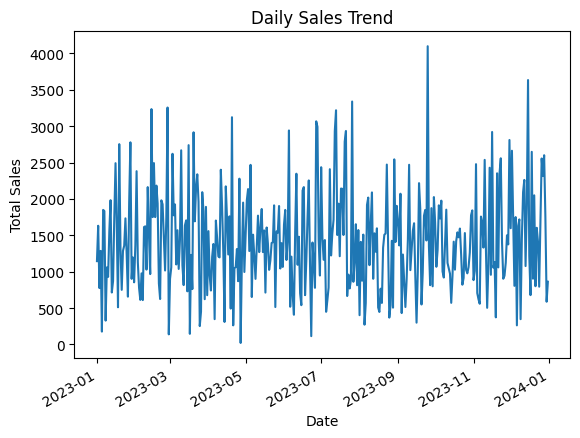

In [15]:
#ploting daily_sales
plt.figure()
daily_sales.plot()
plt.title("Daily Sales Trend")
plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.show()


In [16]:
#comapring product line with total sales
product_sales = df.groupby('Product_Line')['Total'].sum().sort_values(ascending=False)


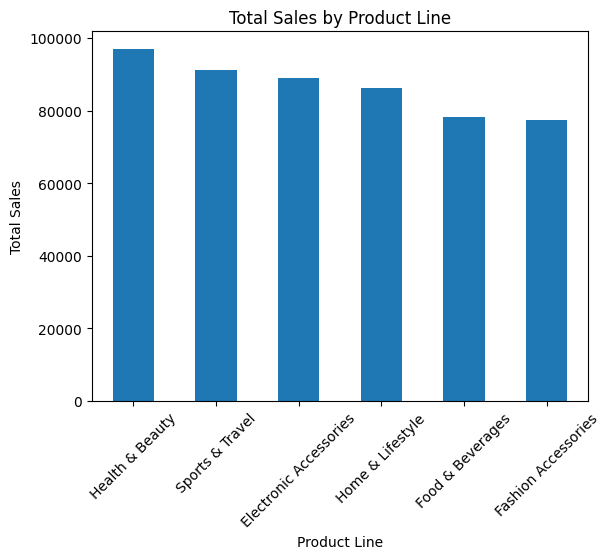

In [17]:
plt.figure()
product_sales.plot(kind='bar')
plt.title("Total Sales by Product Line")
plt.xlabel("Product Line")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.show()


In [18]:
#analysing with customer_type
customer_sales = df.groupby('Customer_Type')['Total'].sum()


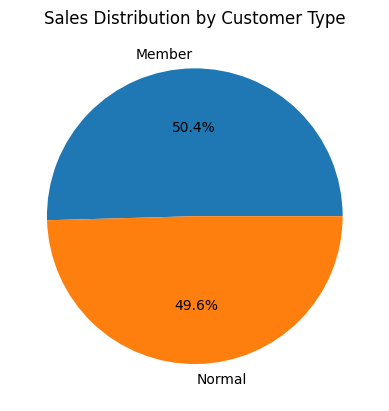

In [19]:
plt.figure()
customer_sales.plot(kind='pie', autopct='%1.1f%%')
plt.title("Sales Distribution by Customer Type")
plt.ylabel("")
plt.show()


In [20]:
#analysing with customer gender
gender_sales = df.groupby('Gender')['Total'].sum()


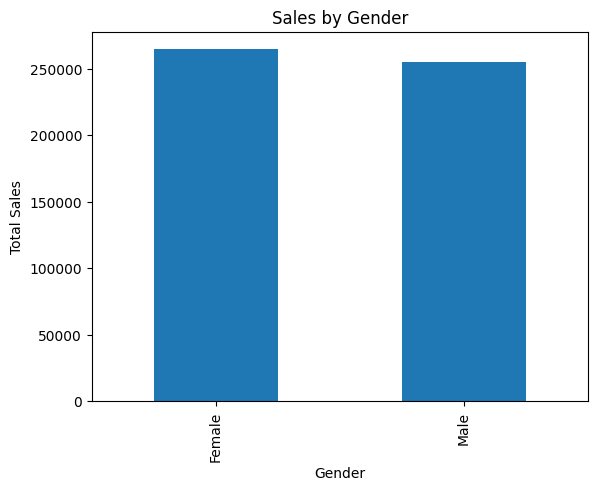

In [21]:
plt.figure()
gender_sales.plot(kind='bar')
plt.title("Sales by Gender")
plt.xlabel("Gender")
plt.ylabel("Total Sales")
plt.show()


In [22]:
mean_sales = df['Total'].mean()
median_sales = df['Total'].median()
print("Mean Sales:", mean_sales)
print("Median Sales:", median_sales)


Mean Sales: 259.640345
Median Sales: 258.03999999999996
